# San Francisco Bike Share data from 2013 to 2015

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Let's explore the data!
The San Francisco bike sharing data came with four CSV files: station, status, weather, and trip

In [2]:
station = pd.read_csv('station.csv')
station

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013
5,7,Paseo de San Antonio,37.333798,-121.886943,15,San Jose,8/7/2013
6,8,San Salvador at 1st,37.330165,-121.885831,15,San Jose,8/5/2013
7,9,Japantown,37.348742,-121.894715,15,San Jose,8/5/2013
8,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013
9,11,MLK Library,37.335885,-121.885660,19,San Jose,8/6/2013


In [3]:
status = pd.read_csv('status.csv')

In [4]:
status.head()

,station_id,bikes_available,docks_available,time
0,2,2,25,2013/08/29 12:06:01
1,2,2,25,2013/08/29 12:07:01
2,2,2,25,2013/08/29 12:08:01
3,2,2,25,2013/08/29 12:09:01
4,2,2,25,2013/08/29 12:10:01


## Let's see what bike availability looks like for each station.

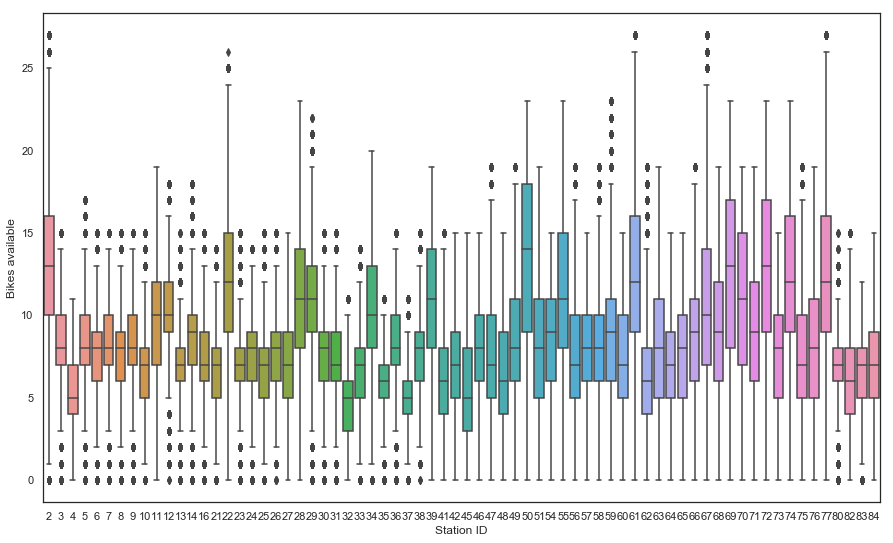

In [88]:
plt.figure(figsize=(15,9))
sns.set(style="white", palette="Set2")
sns.boxplot(data = status, x = 'station_id', y = 'bikes_available')
plt.xlabel("Station ID")
plt.ylabel("Bikes available")
plt.savefig('bike_availability_by_station.jpeg')

It seems that stations 2-38 are less likely to run out of bikes as compared to stations 39-77.  Why could that be?  Looking at the station names from the station.csv file it is obvious that station 39-77 are more popular because they are in the city of San Francisco.  Some of the less used stations are as far out as San Jose.  



## Can we look at those stations 2-38 more closely, perhaps with a different plot to glean more information?

In [6]:
status_2_38 = status[ (status.station_id>=2) &(status.station_id<=38)]
status_2_38.head()

,station_id,bikes_available,docks_available,time
0,2,2,25,2013/08/29 12:06:01
1,2,2,25,2013/08/29 12:07:01
2,2,2,25,2013/08/29 12:08:01
3,2,2,25,2013/08/29 12:09:01
4,2,2,25,2013/08/29 12:10:01


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


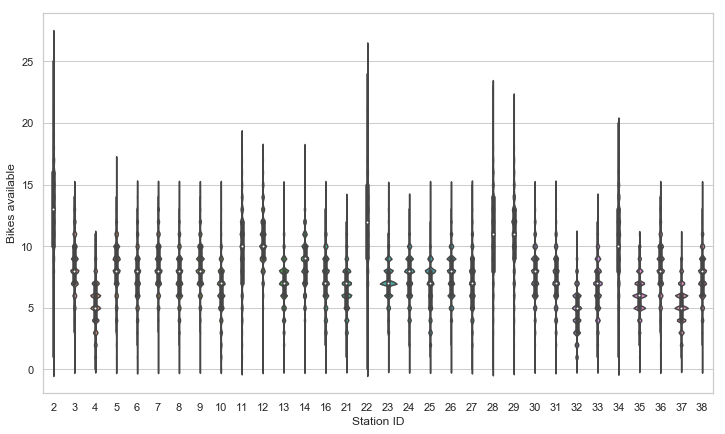

In [7]:
plt.figure(figsize=(12,7))
sns.set(style="whitegrid", palette="Set2")
sns.violinplot(data = status_2_38, x = 'station_id', y = 'bikes_available')
plt.xlabel("Station ID")
plt.ylabel("Bikes available")
plt.savefig('bike_availability_by_station_2_38.pdf')

That violin plot does not give much information, there is no mean distribution that the bike availability clusters around, it fluctuates a lot.  

## Let's try looking at one station in particular, San Jose Diridon Caltrain Station (id = 2), and see how its bike availability changes throughout the day

In [8]:
station_groups = status.groupby('station_id')

In [9]:
station_2 = station_groups.get_group(2)

In [10]:
station_2.index = pd.to_datetime(station_2['time'])  
station_2.head()

,station_id,bikes_available,docks_available,time
time,,,,
2013-08-29 12:06:01,2,2,25,2013/08/29 12:06:01
2013-08-29 12:07:01,2,2,25,2013/08/29 12:07:01
2013-08-29 12:08:01,2,2,25,2013/08/29 12:08:01
2013-08-29 12:09:01,2,2,25,2013/08/29 12:09:01
2013-08-29 12:10:01,2,2,25,2013/08/29 12:10:01


In [11]:
hourly = station_2.resample('H').agg({'bikes_available': 'mean'})

In [12]:
hourly= pd.DataFrame(hourly)
hourly['time_of_day'] = hourly.index
hourly['time_of_day'] =hourly['time_of_day'].dt.strftime('%H')
hourly.head()

,bikes_available,time_of_day
time,,
2013-08-29 12:00:00,2.000000,12
2013-08-29 13:00:00,2.698113,13
2013-08-29 14:00:00,2.000000,14
2013-08-29 15:00:00,2.000000,15
2013-08-29 16:00:00,2.000000,16


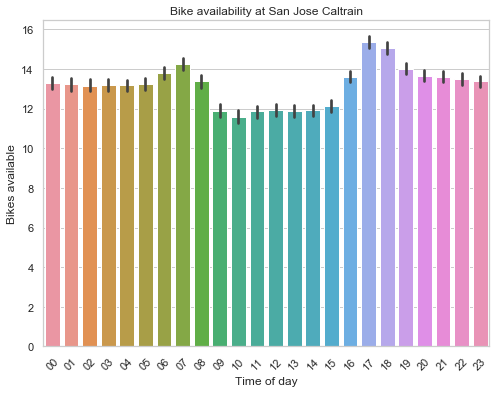

In [13]:
plt.figure(figsize=(8,6))
sns.set_palette('bright')
ax = sns.barplot(data = hourly, x = 'time_of_day', y = 'bikes_available')
plt.xticks(rotation=45)
plt.xlabel("Time of day")
plt.ylabel("Bikes available")
plt.title("Bike availability at San Jose Caltrain") 
plt.savefig('bike_availability.pdf')

Not a very surprising result that there is greatest demand for bikes between 8am and 4pm.  

## Station 2 in San Jose is not one of the most used stations, let's compare with station 62,   2nd at Folsom, in San Francisco	

In [14]:
station_62 = station_groups.get_group(62)
station_62.index = pd.to_datetime(station_62['time'])  
station_62.head()

,station_id,bikes_available,docks_available,time
time,,,,
2013-08-29 12:06:01,62,10,9,2013/08/29 12:06:01
2013-08-29 12:07:01,62,10,9,2013/08/29 12:07:01
2013-08-29 12:08:01,62,10,9,2013/08/29 12:08:01
2013-08-29 12:09:01,62,10,9,2013/08/29 12:09:01
2013-08-29 12:10:01,62,10,9,2013/08/29 12:10:01


In [15]:
hourly_62 = station_62.resample('H').agg({'bikes_available': 'mean'})

In [16]:
hourly_62= pd.DataFrame(hourly_62)
hourly_62['time_of_day'] = hourly_62.index
hourly_62['time_of_day'] =hourly_62['time_of_day'].dt.strftime('%H')
hourly_62.head()

,bikes_available,time_of_day
time,,
2013-08-29 12:00:00,9.500000,12
2013-08-29 13:00:00,9.264151,13
2013-08-29 14:00:00,9.928571,14
2013-08-29 15:00:00,10.055556,15
2013-08-29 16:00:00,10.000000,16


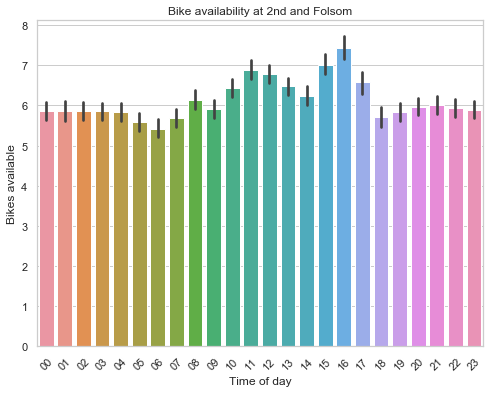

In [17]:
plt.figure(figsize=(8,6))
sns.set_palette('bright')
ax = sns.barplot(data = hourly_62, x = 'time_of_day', y = 'bikes_available')
plt.xticks(rotation=45)
plt.xlabel("Time of day")
plt.ylabel("Bikes available")
plt.title("Bike availability at 2nd and Folsom") 
plt.savefig('bike_availability_station_62.pdf')

Interesting, unlike station 2 in San Jose, station 62 in San Francisco actually has greater bike availability during business hours from people commuting in.

## Now looking at bike trips per month over the three years of data provided.  Has usership grown? Waned? Are there any identifyable drop-offs?

In [18]:
trip = pd.read_csv('trip.csv')

In [35]:
trip['start_date'] = pd.to_datetime(trip['start_date'])  

In [36]:
trip.start_date.head()

start_date
2013-08-29 14:13:00   2013-08-29
2013-08-29 14:42:00   2013-08-29
2013-08-29 10:16:00   2013-08-29
2013-08-29 11:29:00   2013-08-29
2013-08-29 12:02:00   2013-08-29
Name: start_date, dtype: datetime64[ns]

In [37]:
#let's count trips per month
trip.index = trip['start_date']

In [38]:
#let's resample by months

monthly_trips = trip.resample('M').size()
monthly_trips= pd.DataFrame(monthly_trips)

In [39]:
monthly_trips.columns = ['trip_count']
monthly_trips['date']= monthly_trips.index
monthly_trips.head()

,trip_count,date
start_date,,
2013-08-31,2102,2013-08-31
2013-09-30,25243,2013-09-30
2013-10-31,29105,2013-10-31
2013-11-30,24219,2013-11-30
2013-12-31,19894,2013-12-31


In [40]:
monthly_trips['date'] = monthly_trips['date'].dt.strftime('%Y-%m')

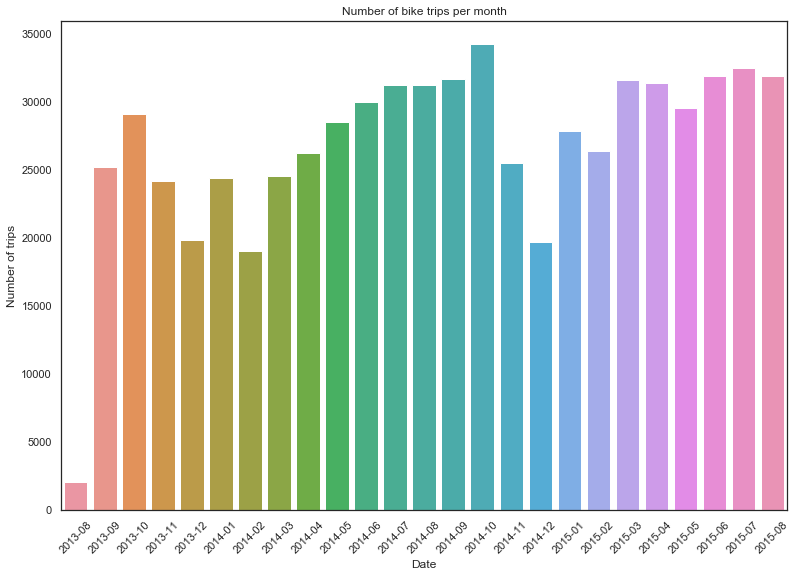

In [89]:
plt.figure(figsize=(13,9))
sns.set_palette('bright')
ax = sns.barplot(data = monthly_trips, x = 'date', y = 'trip_count')
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Number of trips")
plt.title("Number of bike trips per month") 
plt.savefig('montly_trips.jpeg')

Looks like usership ramped up to 25,000 trips per month quickly.  There was more fluctuation in 2013 and early 2014, but then trip numbers stabilized around 30,000 per month.  There is a drop-off seen for November and December of 2014 probably due to the holidays.  January and February are a little bit less utilized, perhaps due to weather (?), but trip numbers once again stabilize around 30,000 from March 2015 onward.  Looking at data for years 2015-2019, not included in this analysis, would confirm the seasonal drop off.  This information could be used to schedule bike/ station maintenance.  

## How does the weather impact trips?

In [42]:
weather = pd.read_csv('weather.csv')

In [43]:
weather['date'] = pd.to_datetime(weather['date'])  
trip['start_date'] = pd.to_datetime(trip['start_date'])

In [44]:
#for making the dates into the same format for merging
trip['start_date'] = trip['start_date'].dt.strftime('%Y-%m-%d')
weather['date'] = weather['date'].dt.strftime('%Y-%m-%d')

Let's merge trips and weather

In [45]:
trip_weather = trip.merge(weather, how = 'left', left_on ='start_date', right_on ='date')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'start_date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [46]:
trip_weather.index = pd.to_datetime(trip_weather['start_date'])  

In [76]:
daily_trip_weather = trip_weather.resample('D').agg({'start_date':'count', 'mean_temperature_f':'mean'})

In [77]:
daily_trip_weather.columns = ['trip_number', 'mean_temp']
daily_trip_weather['date']= daily_trip_weather.index
daily_trip_weather.head()

,trip_number,mean_temp,date
start_date,,,
2013-08-29,3740,70.4,2013-08-29
2013-08-30,3570,73.0,2013-08-30
2013-08-31,3200,68.0,2013-08-31
2013-09-01,3530,70.0,2013-09-01
2013-09-02,3305,70.8,2013-09-02


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


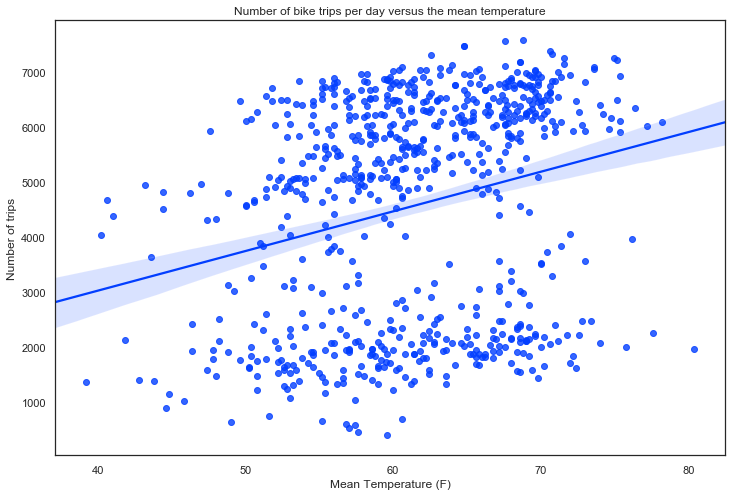

In [90]:
plt.figure(figsize=(12,8))
sns.regplot(data = daily_trip_weather, x = 'mean_temp', y = 'trip_number')
plt.xlabel("Mean Temperature (F)")
plt.ylabel("Number of trips")
plt.title("Number of bike trips per day versus the mean temperature") 
plt.savefig('temp_trips.jpeg')


Wow, there's a lot of noise here, but there seems to be a trend for more bike trips with warmer weather.  Most likely, since the weather in the bay area is so conistently comfortable, between 50-75 Farenheit, the temperature effect will not be as noticable as it would be if the temperature ranged from 30-100 F. 

## Perhaps percipitation is a better indicator of how many bike trips will be made per day

In [65]:
trip_weather.fillna(value={'events': 'Beautiful'}, inplace=True)

In [117]:
weather_groups = trip_weather.groupby('events').agg({'start_date': 'count'})

In [118]:
weather_groups.columns = ['trip_number']

In [119]:
#Add rain and Rain
weather_groups.loc['Rain']= weather_groups.loc['Rain'] + weather_groups.loc['rain']

In [120]:
weather_groups.drop('rain', inplace = True)
weather_groups['event'] = weather_groups.index
weather_groups

,trip_number,event
events,,
Beautiful,2958504,Beautiful
Fog,95474,Fog
Fog-Rain,11672,Fog-Rain
Rain,282395,Rain
Rain-Thunderstorm,1750,Rain-Thunderstorm


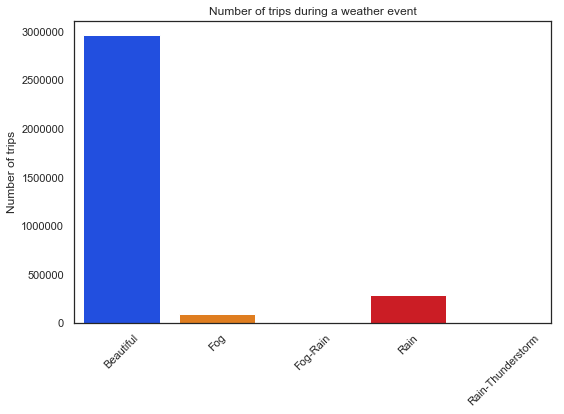

In [121]:
plt.figure(figsize=(8,6))
sns.barplot(data = weather_groups, x = 'event', y = 'trip_number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel("")
plt.ylabel("Number of trips")
plt.title('Number of trips during a weather event')
plt.savefig('weather_events.jpeg')

Looks like weather is not a big factor for this bike share program.  The number of rides carried out on beautiful days far eclipses the othe categories.  Of course this analysis is not counting how many days were beautiful, rather how many rides were carried out on beautiful days, so it is biased in that sense. 